In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
%matplotlib inline 
from IPython.core.display import display, HTML
sns.set_style()
data = pd.read_csv('/Users/yleng/Dropbox (MIT)/PhD/2019_Spring/polarization/soft_launch/soft-launch-V2/soft_launch_two_rounds.csv')
democrats = data[data['data.political_affiliation'] == 'democrat']
republicans = data[data['data.political_affiliation'] == 'republican']
apolitical =  data[data['priming'] == 'apolitical']
enemy =  data[data['priming'] == 'enemy']
patriotic =  data[data['priming'] == 'patriotic']

In [82]:
display(HTML('<h1>Soft launch analysis</h1>'))
print('- We conduct two rounds of soft launch on April 16 and April 28. 12 republicans and 12 democrats are recuited.')
print('- They interacted with a bot representing a member of the other political party. ')
print('- They have the opportunity to revise their initial answer. ')
print('- Two conditions of bot behavior: friendly bots and stubborn bots.')
print('- Three conditions for priming: control, ingroup pride, outgroup threat. ')

- We conduct two rounds of soft launch on April 16 and April 28. 12 republicans and 12 democrats are recuited.
- They interacted with a bot representing a member of the other political party. 
- They have the opportunity to revise their initial answer. 
- Two conditions of bot behavior: friendly bots and stubborn bots.
- Three conditions for priming: control, ingroup pride, outgroup threat. 


On average, democrats make larger predictions than republicans (not significantly different).


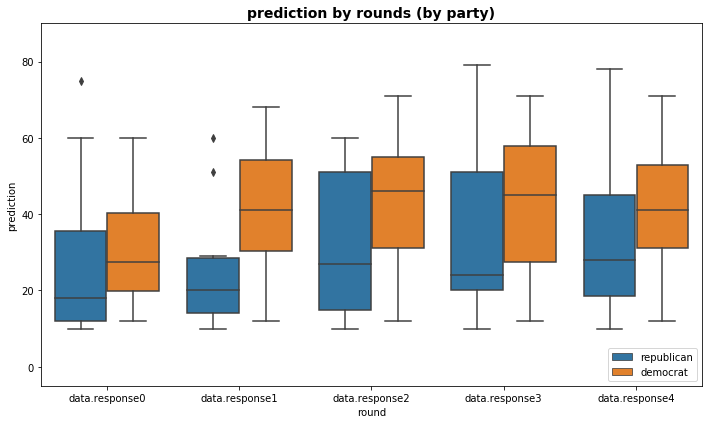

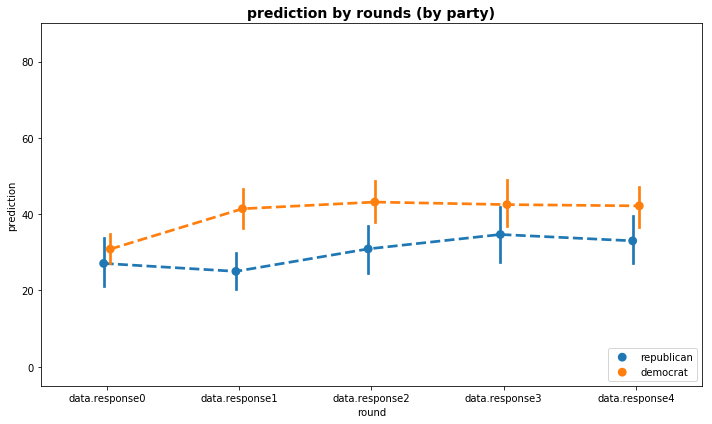

In [83]:
display(HTML('<h2>1. Predictions across rounds </h2>'))
display(HTML('<h3>1.1 Predictions across rounds (by political party) </h3>'))
print('On average, democrats make larger predictions than republicans (not significantly different).')
plt.figure(figsize = (10, 6))
predictions=pd.melt(data,id_vars=['data.political_affiliation'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='data.political_affiliation',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (by party)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)
plt.tight_layout()
plt.savefig('pred_by_rounds_party.png')

plt.figure(figsize = (10, 6))
sns.pointplot(hue='data.political_affiliation',y='prediction',data=predictions,x='round', ci = 68, dodge=True, linestyles=["--", "--"])
plt.title('prediction by rounds (by party)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)
plt.tight_layout()
plt.savefig('pred_by_rounds_party_point_est.png')

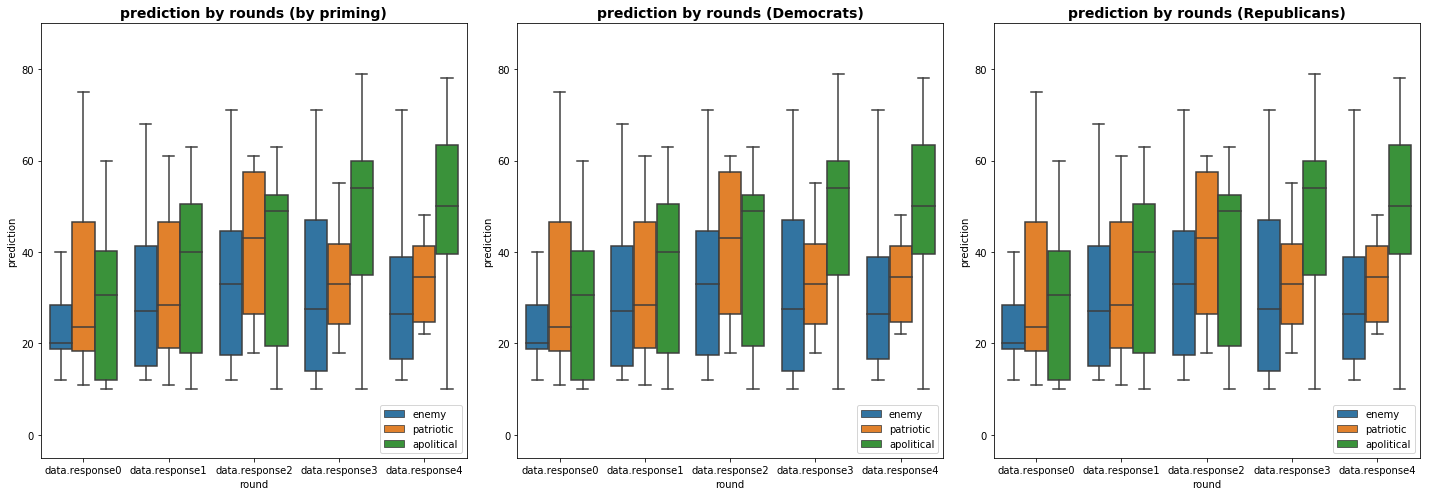

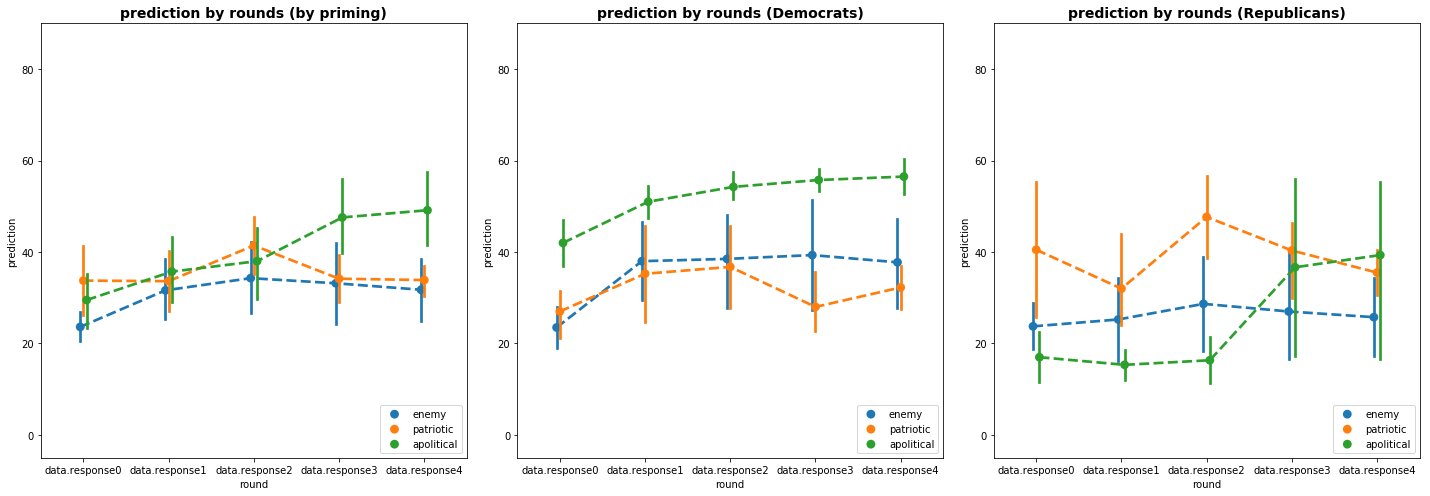

In [92]:
display(HTML('<h3>1.2 Predictions across rounds by priming  </h3>'))
plt.figure(figsize = (20, 7))
plt.subplot(131)
predictions=pd.melt(data,id_vars=['priming'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='priming',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (by priming)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)


plt.subplot(132)
predictions_demo=pd.melt(democrats,id_vars=['priming'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='priming',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (Democrats)', fontweight = 'bold', fontsize = 14)
plt.legend(loc = 4)
plt.ylim(-5, 90)

plt.subplot(133)
predictions_repub=pd.melt(republicans,id_vars=['priming'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='priming',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (Republicans)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)
plt.tight_layout()

plt.savefig('pred_by_rounds_priming.png')

plt.figure(figsize = (20, 7))
plt.subplot(131)
sns.pointplot(hue='priming',y='prediction',data=predictions,x='round', dodge=True, ci = 68, linestyles=["--", "--", "--"])
plt.legend(loc = 4)
plt.title('prediction by rounds (by priming)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)

plt.subplot(132)
sns.pointplot(hue='priming',y='prediction',data=predictions_demo,x='round', dodge=True, ci = 68, linestyles=["--", "--", "--"])
plt.title('prediction by rounds (Democrats)', fontweight = 'bold', fontsize = 14)
plt.legend(loc = 4)
plt.ylim(-5, 90)

plt.subplot(133)
sns.pointplot(hue='priming',y='prediction',data=predictions_repub,x='round', dodge=True, ci = 68, linestyles=["--", "--", "--"])
plt.title('prediction by rounds (Republicans)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)
plt.tight_layout()

plt.savefig('pred_by_rounds_priming_point_est.png')

Across rounds, democrats update more with stubborn bots and republican update more with friendly bots.


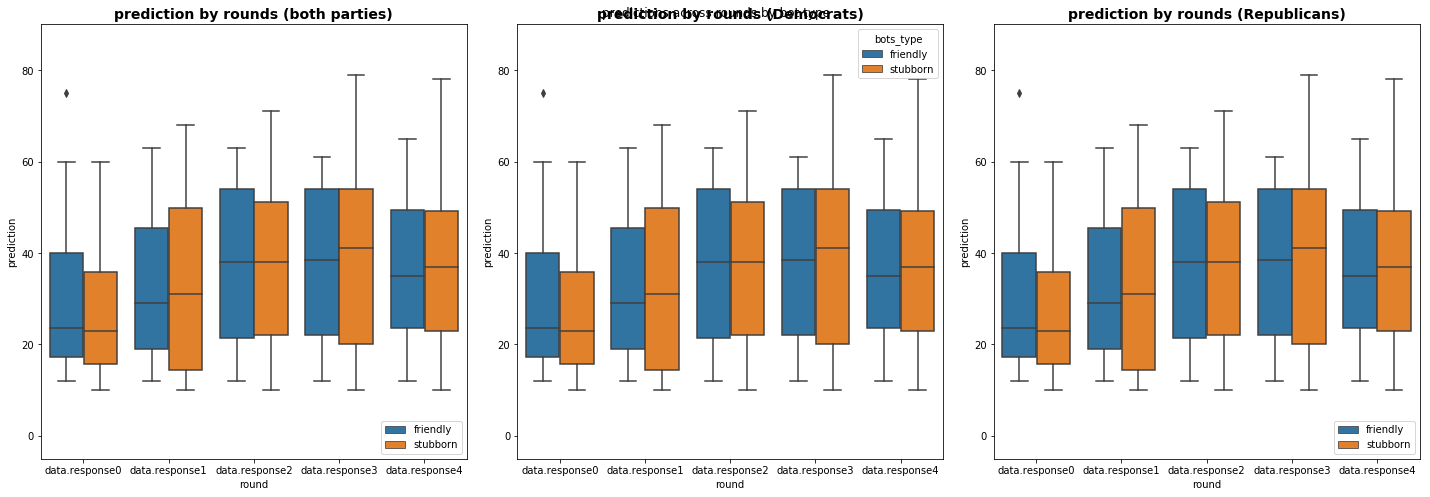

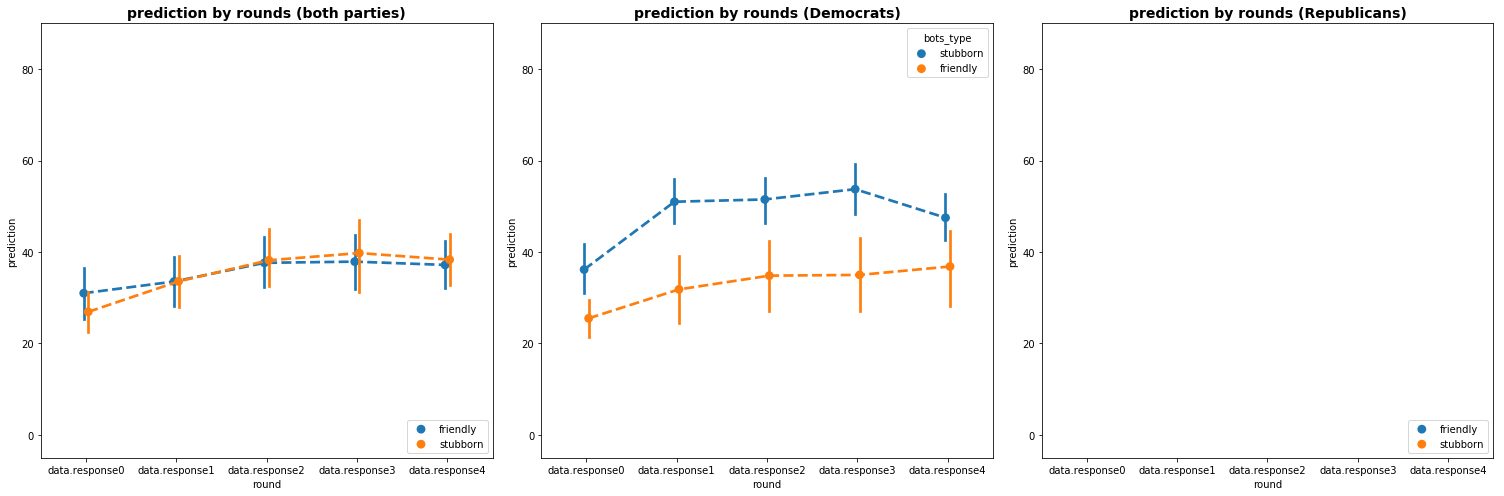

In [93]:
display(HTML('<h3>1.3 Predictions across rounds by bot type </h3>'))
print('Across rounds, democrats update more with stubborn bots and republican update more with friendly bots.')
plt.suptitle('predictions across rounds by bot type')
plt.figure(figsize = (20, 7))
plt.subplot(131)
predictions=pd.melt(data,id_vars=['bots_type'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='bots_type',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (both parties)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)


plt.subplot(132)
predictions_demo=pd.melt(democrats,id_vars=['bots_type'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='bots_type',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (Democrats)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)

plt.subplot(133)
predictions_repub=pd.melt(republicans,id_vars=['bots_type'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.boxplot(hue='bots_type',y='prediction',data=predictions,x='round')
plt.title('prediction by rounds (Republicans)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)
plt.tight_layout()

plt.savefig('pred_by_rounds_bots.png')

plt.suptitle('predictions across rounds by bot type')
plt.figure(figsize = (21, 7))
plt.subplot(131)
sns.pointplot(hue='bots_type',y='prediction',data=predictions,x='round', dodge=True, ci = 68, linestyles=["--", "--", "--"])
plt.title('prediction by rounds (both parties)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)


plt.subplot(132)
sns.pointplot(hue='bots_type',y='prediction',data=predictions_demo,x='round', dodge=True, ci = 68, linestyles=["--", "--", "--"])
plt.title('prediction by rounds (Democrats)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)

plt.subplot(133)
predictions=pd.melt(predictions_repub,id_vars=['bots_type'],value_vars=['data.response0', 'data.response1','data.response2', 'data.response3','data.response4'],var_name='round', value_name = 'prediction')
sns.pointplot(hue='bots_type',y='prediction',data=predictions,x='round', dodge=True, ci = 68, linestyles=["--", "--", "--"])
plt.title('prediction by rounds (Republicans)', fontweight = 'bold', fontsize = 14)
plt.ylim(-5, 90)
plt.legend(loc = 4)
plt.tight_layout()

plt.savefig('pred_by_rounds_bots_point_est.png')

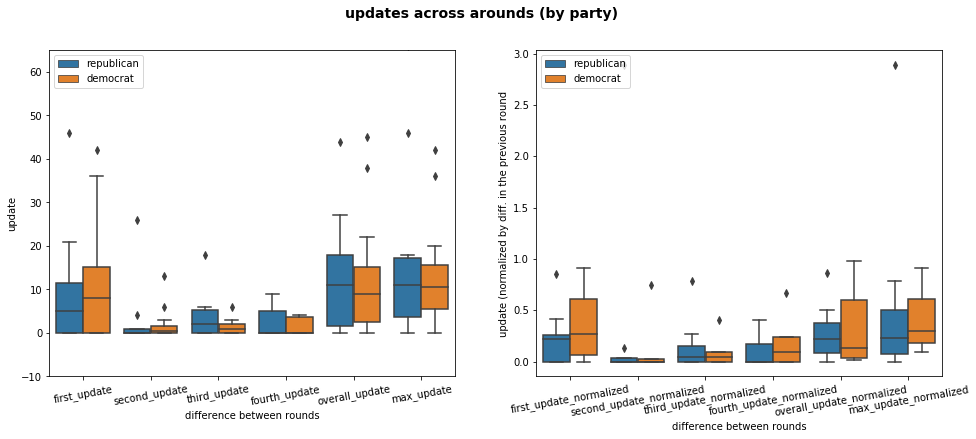

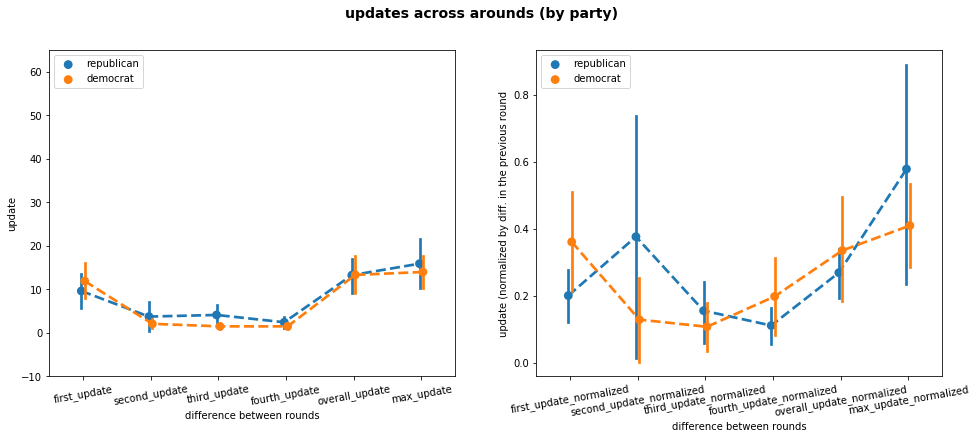

In [94]:
display(HTML('<h2>2. Updates across rounds </h2>'))

plt.figure(figsize = (16, 6))
plt.subplot(121)
update=pd.melt(data,id_vars=['data.political_affiliation'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='data.political_affiliation',y='update',data=update,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
updateNormalized=pd.melt(data,id_vars=['data.political_affiliation'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], \
               var_name='difference between rounds', value_name = 'update (normalized by diff. in the previous round')
sns.boxplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',data=updateNormalized,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('updates across arounds (by party)', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_party.png')



plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.pointplot(hue='data.political_affiliation',y='update',data=update,x='difference between rounds',ci = 68, dodge=True, linestyles=["--", "--", "--"])
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
sns.pointplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',\
            dodge=True, linestyles=["--", "--", "--"],ci = 68, \
              data=updateNormalized,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('updates across arounds (by party)', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_party_point_est.png')


Republicans update more with patriotic priming, and less with enemy priming
Republican update more with apolitical priming, but only according to the normalized update meausre.


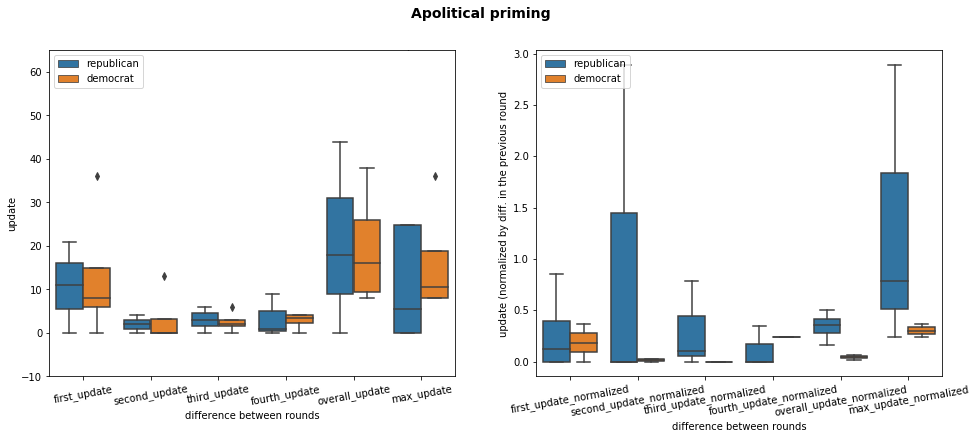

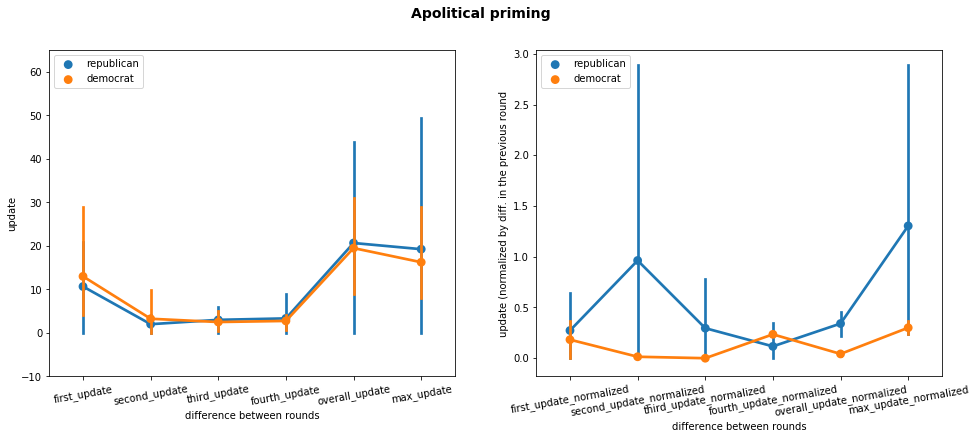

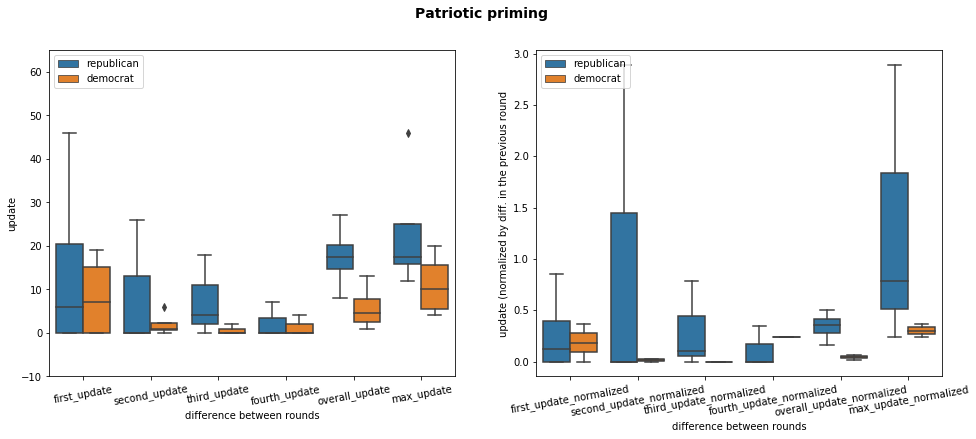

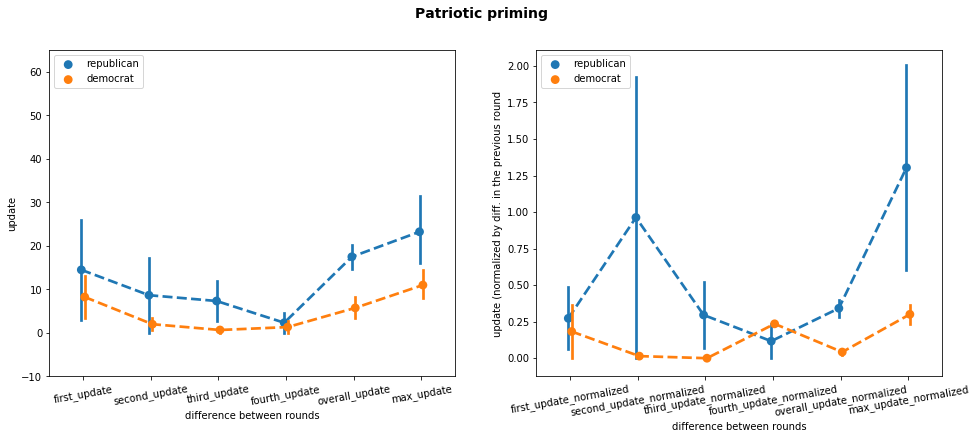

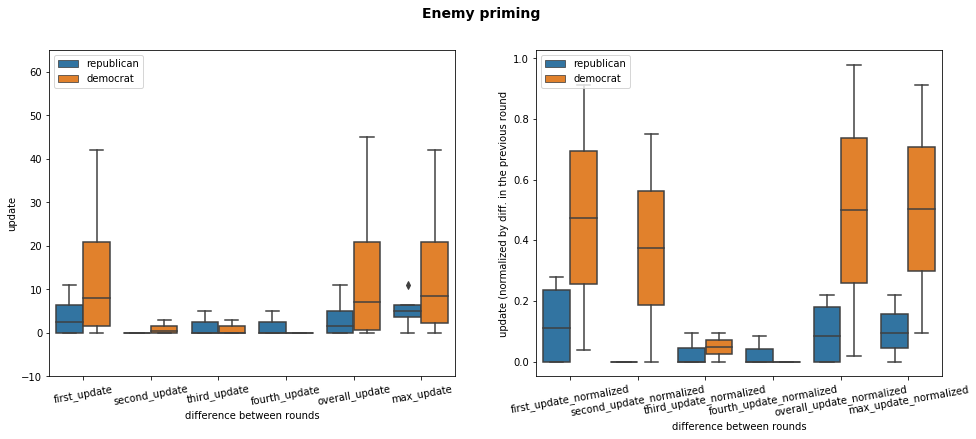

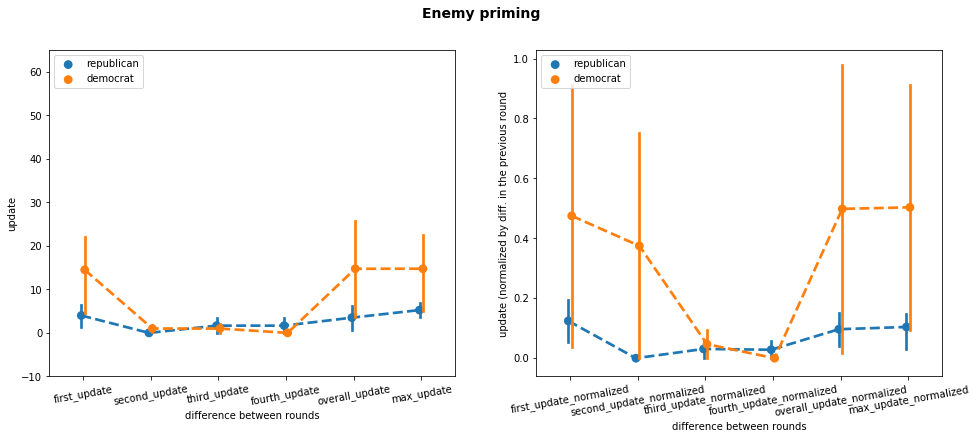

In [87]:
display(HTML('<h3>2.1 Updates across rounds with different primings </h3>'))
print('Republicans update more with patriotic priming, and less with enemy priming')
print('Republican update more with apolitical priming, but only according to the normalized update meausre.')
plt.figure(figsize = (16, 6))
plt.subplot(121)
update_apol=pd.melt(apolitical,id_vars=['data.political_affiliation'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='data.political_affiliation',y='update',data=update_apol,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
updateNormalized_apol=pd.melt(patriotic,id_vars=['data.political_affiliation'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], \
               var_name='difference between rounds', value_name = 'update (normalized by diff. in the previous round')
sns.boxplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',data=updateNormalized_apol,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('Apolitical priming', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_apolitical.png')

plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.pointplot(hue='data.political_affiliation',y='update',data=update_apol,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
sns.pointplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',\
              data=updateNormalized_apol,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('Apolitical priming', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_apolitical_point_est.png')

plt.figure(figsize = (16, 6))
plt.subplot(121)
update_pat=pd.melt(patriotic,id_vars=['data.political_affiliation'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='data.political_affiliation',y='update',data=update_pat,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
updateNormalized_pat =pd.melt(patriotic,id_vars=['data.political_affiliation'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], \
               var_name='difference between rounds', value_name = 'update (normalized by diff. in the previous round')
sns.boxplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',data=updateNormalized_pat,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('Patriotic priming', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_patriotic.png')

plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.pointplot(hue='data.political_affiliation',y='update',data=update_pat,dodge=True, ci = 68, linestyles=["--", "--", "--"], x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
sns.pointplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',\
              dodge=True, linestyles=["--", "--", "--"], ci = 68, data=updateNormalized_pat,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('Patriotic priming', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_patriotic_point_est.png')


plt.figure(figsize = (16, 6))
plt.subplot(121)
update_ene=pd.melt(enemy,id_vars=['data.political_affiliation'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='data.political_affiliation',y='update',data=update_ene,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
updateNormalized_ene=pd.melt(enemy,id_vars=['data.political_affiliation'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], \
               var_name='difference between rounds', value_name = 'update (normalized by diff. in the previous round')
sns.boxplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',\
             data=updateNormalized_ene,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('Enemy priming', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_enemy.png')

plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.pointplot(hue='data.political_affiliation',y='update',ci = 68, data=update_ene,dodge=True, linestyles=["--", "--", "--"], x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.ylim(-10, 65)

plt.subplot(122)
sns.pointplot(hue='data.political_affiliation',y='update (normalized by diff. in the previous round',dodge=True, \
              linestyles=["--", "--", "--"], ci = 68, data=updateNormalized_ene,x='difference between rounds')
plt.legend(loc = 2)
plt.xticks(rotation = 10)
plt.suptitle('Enemy priming', fontweight = 'bold', fontsize = 14)
plt.savefig('updates_rounds_enemy_point_est.png')


- Patriotic priming triggers more update than apolitical priming for both parties
- Enemy priming triggers the least update for republicans.
- Republicans update more with apolotical priming than democrats


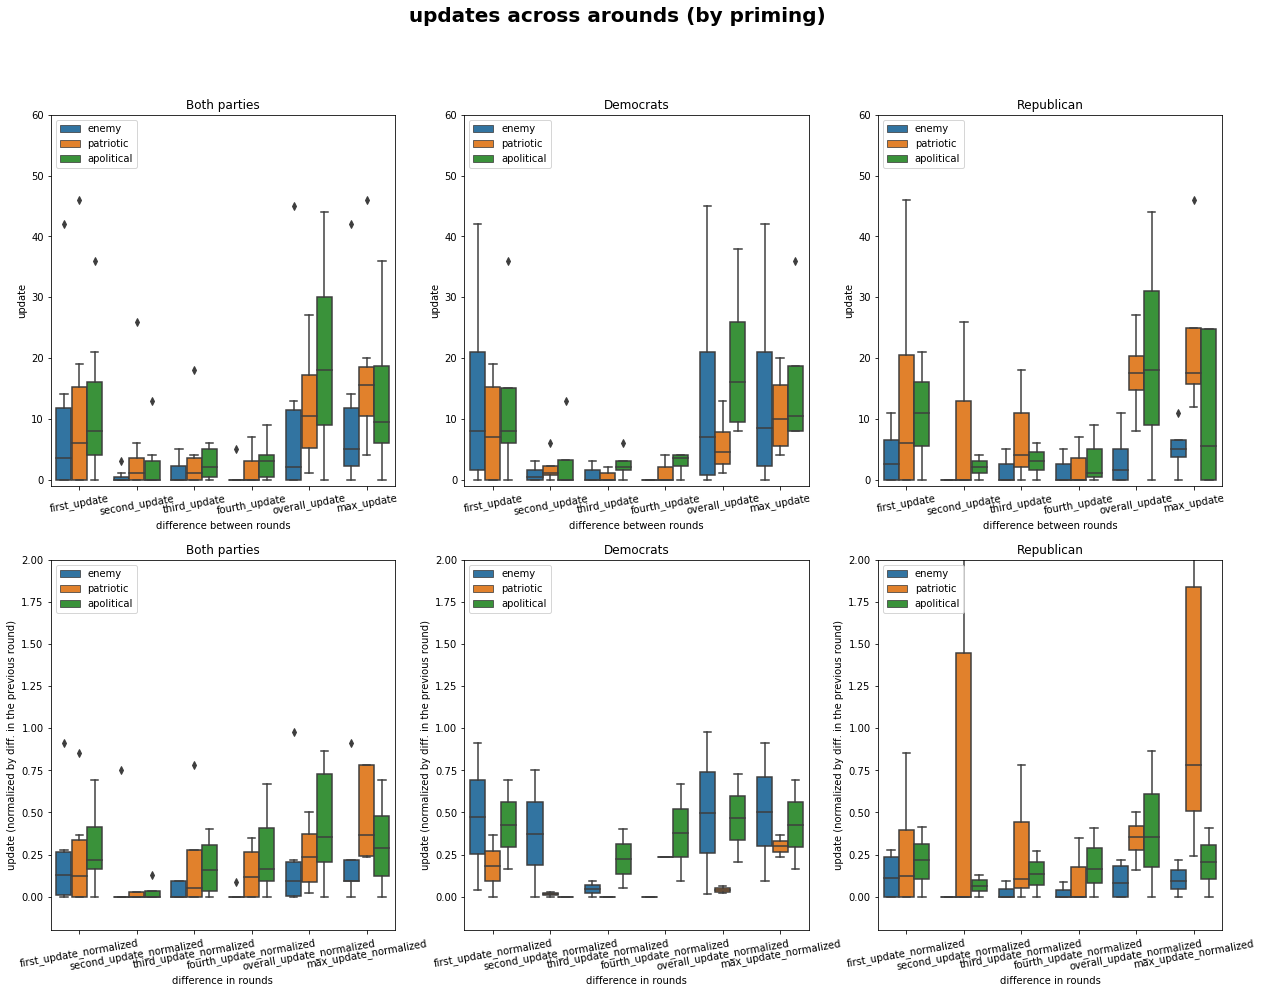

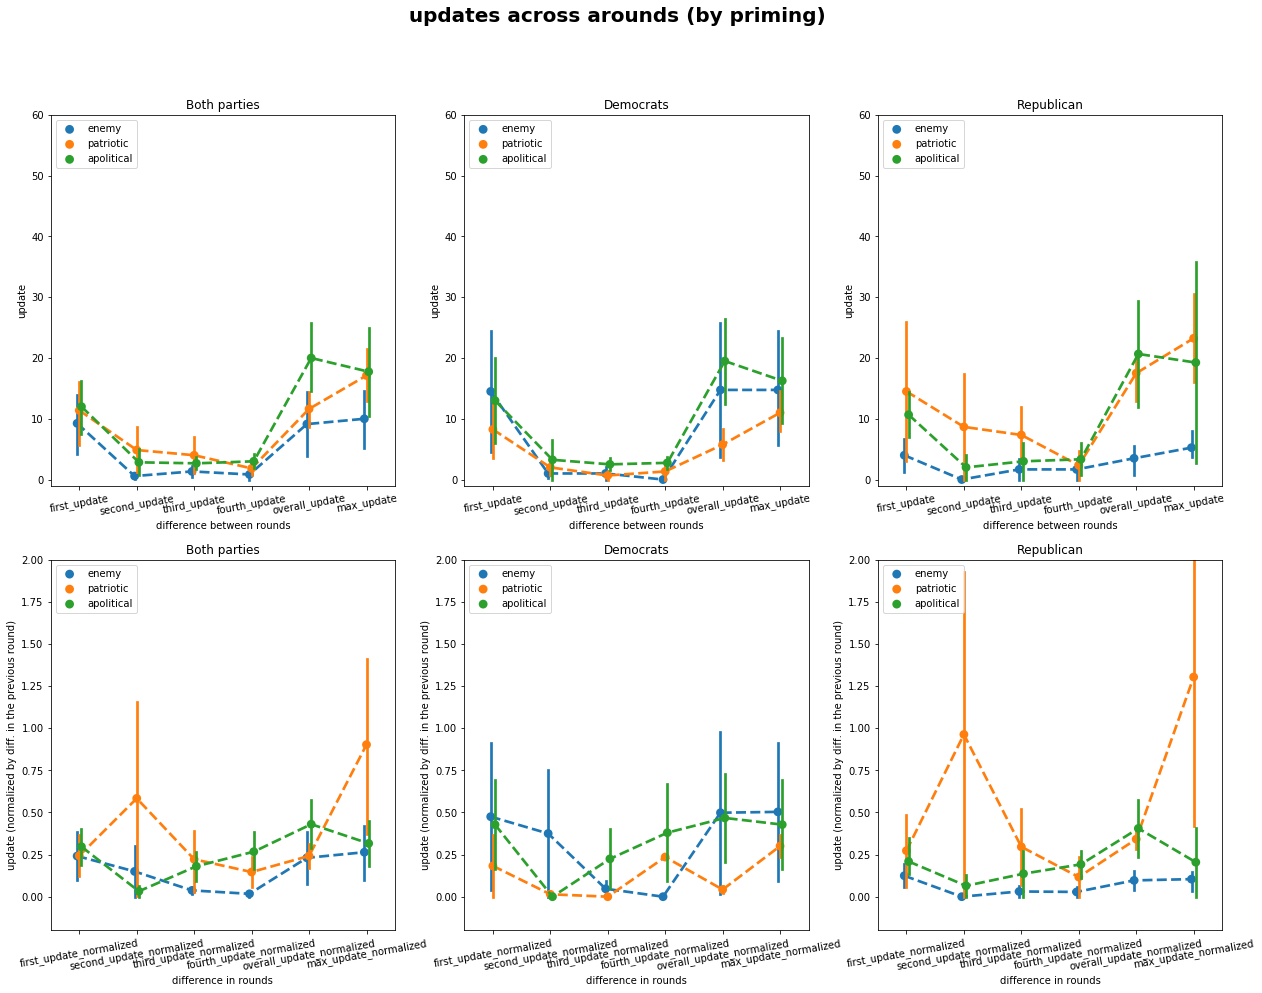

In [96]:
plt.figure(figsize = (21, 15))
display(HTML('<h3>2.2 Updates across rounds by priming condition </h3>'))
print('- Patriotic priming triggers more update than apolitical priming for both parties')
print('- Enemy priming triggers the least update for republicans.')
print('- Republicans update more with apolotical priming than democrats')
plt.subplot(231)
plt.suptitle('updates across arounds (by priming)', fontweight = 'bold', fontsize = 20)
plt.title('Both parties')
update=pd.melt(data,id_vars=['priming'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='priming',y='update',data=update,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(232)
plt.title('Democrats')
update_demo=pd.melt(democrats,id_vars=['priming'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='priming',y='update',data=update_demo,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(233)
plt.title('Republican')
update_repub=pd.melt(republicans,id_vars=['priming'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='priming',y='update',data=update_repub,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(234)
plt.title('Both parties')
updateNormalized=pd.melt(data,id_vars=['priming'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], var_name='difference in rounds', value_name = 'update (normalized by diff. in the previous round)')
sns.boxplot(hue='priming',y='update (normalized by diff. in the previous round)',data=updateNormalized,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(235)
plt.title('Democrats')
updateNormalized_demo=pd.melt(democrats,id_vars=['priming'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], var_name='difference in rounds', value_name = 'update (normalized by diff. in the previous round)')
sns.boxplot(hue='priming',y='update (normalized by diff. in the previous round)',data=updateNormalized_demo,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(236)
plt.title('Republican')
updateNormalized_repub=pd.melt(republicans,id_vars=['priming'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], var_name='difference in rounds', value_name = 'update (normalized by diff. in the previous round)')
sns.boxplot(hue='priming',y='update (normalized by diff. in the previous round)',data=updateNormalized_repub,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.savefig('updates_rounds_priming.png')

plt.figure(figsize = (21, 15))
plt.suptitle('updates across arounds (by priming)', fontweight = 'bold', fontsize = 20)
plt.subplot(231)
plt.title('Both parties')
sns.pointplot(hue='priming',y='update',dodge=True, ci = 68, linestyles=["--", "--", "--"], data=update,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(232)
plt.title('Democrats')
update=pd.melt(update_demo,id_vars=['priming'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.pointplot(hue='priming',y='update',dodge=True,ci = 68,  linestyles=["--", "--", "--"], data=update_demo,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(233)
plt.title('Republican')
sns.pointplot(hue='priming',y='update',dodge=True, ci = 68, linestyles=["--", "--", "--"], data=update_repub,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(234)
plt.title('Both parties')
sns.pointplot(hue='priming',y='update (normalized by diff. in the previous round)',ci = 68, dodge=True, linestyles=["--", "--", "--"], \
              data=updateNormalized,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(235)
plt.title('Democrats')
sns.pointplot(hue='priming',y='update (normalized by diff. in the previous round)',ci = 68, \
              dodge=True, linestyles=["--", "--", "--"], data=updateNormalized_demo,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(236)
plt.title('Republican')
sns.pointplot(hue='priming',y='update (normalized by diff. in the previous round)',ci = 68, dodge=True, linestyles=["--", "--", "--"], data=updateNormalized_repub,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.savefig('updates_rounds_priming_point_est.png')

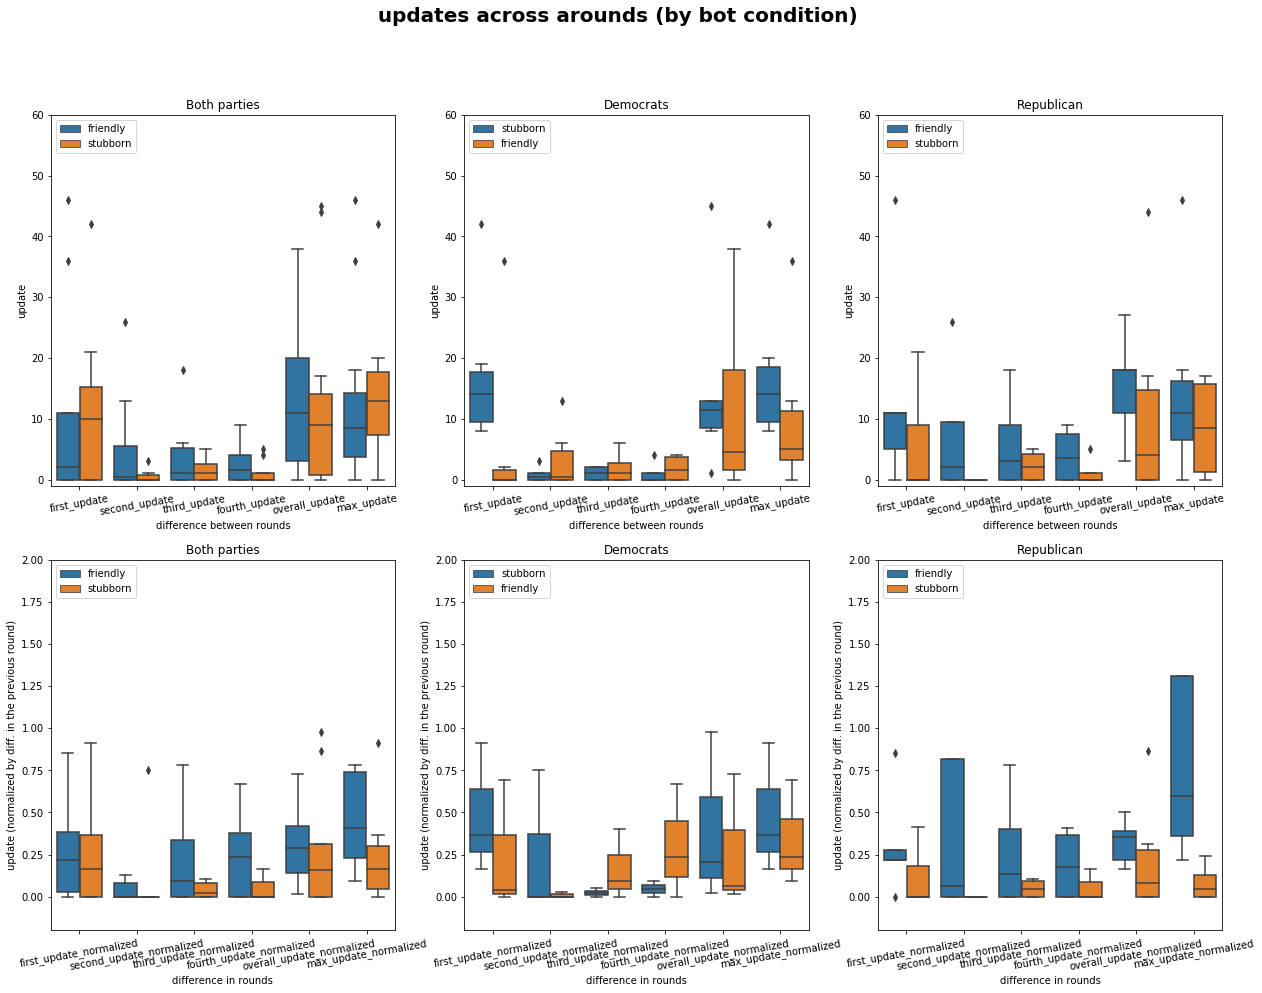

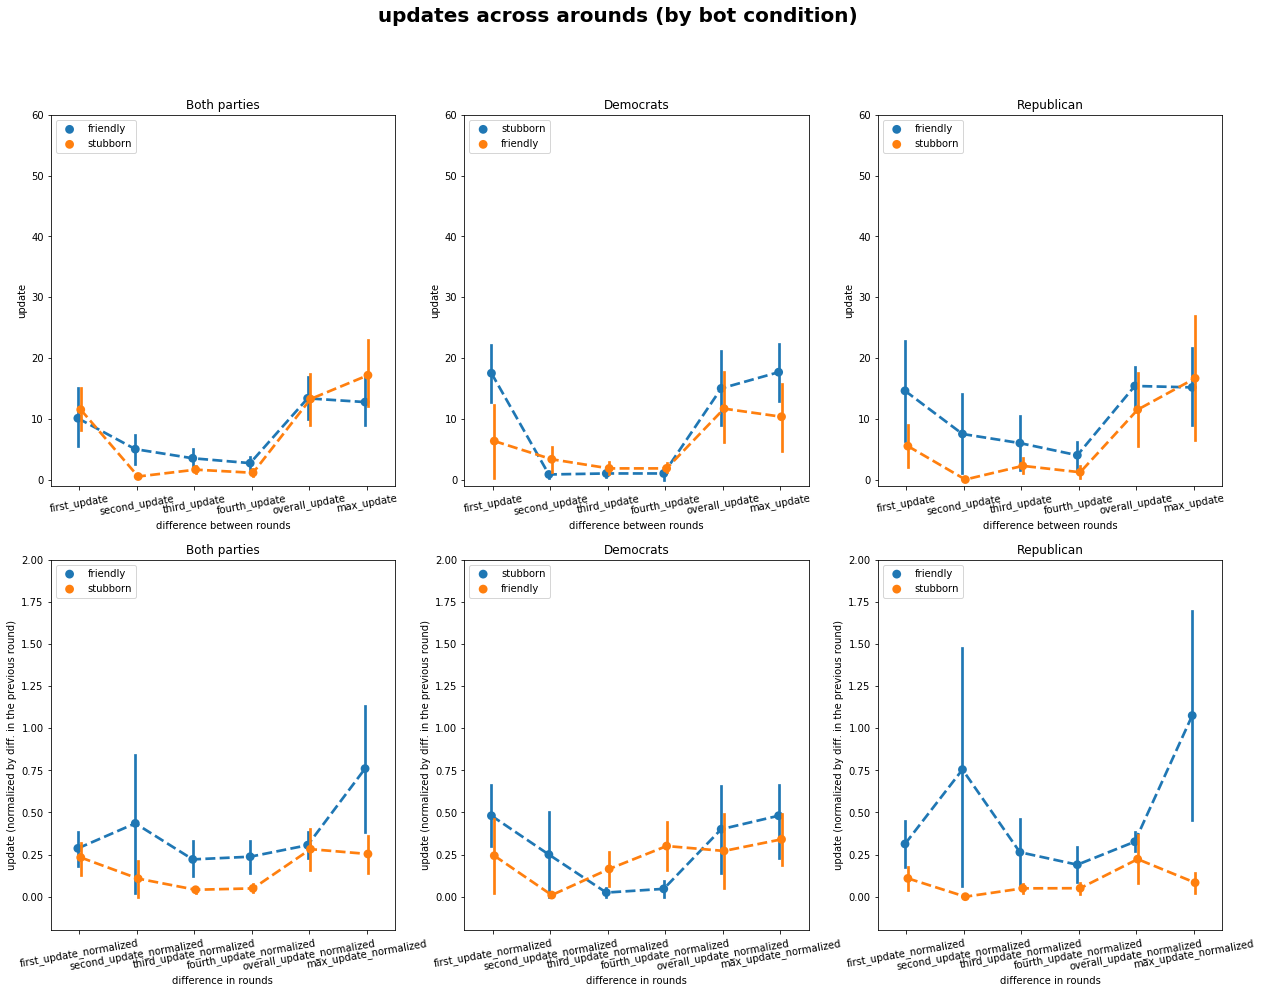

In [97]:
plt.figure(figsize = (21, 15))
display(HTML('<h3>2.3 Updates across rounds by bot condition </h3>'))
plt.subplot(231)
plt.suptitle('updates across arounds (by bot condition)', fontweight = 'bold', fontsize = 20)
plt.title('Both parties')
update=pd.melt(data,id_vars=['bots_type'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='bots_type',y='update',data=update,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(232)
plt.title('Democrats')
update_demo=pd.melt(democrats,id_vars=['bots_type'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='bots_type',y='update',data=update_demo,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(233)
plt.title('Republican')
update_repub=pd.melt(republicans,id_vars=['bots_type'],value_vars=['first_update', 'second_update',\
        'third_update', 'fourth_update', 'overall_update', 'max_update'], var_name='difference between rounds', value_name = 'update')
sns.boxplot(hue='bots_type',y='update',data=update_repub,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(234)
plt.title('Both parties')
updateNormalized=pd.melt(data,id_vars=['bots_type'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], var_name='difference in rounds', value_name = 'update (normalized by diff. in the previous round)')
sns.boxplot(hue='bots_type',y='update (normalized by diff. in the previous round)',data=updateNormalized,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(235)
plt.title('Democrats')
updateNormalized_demo=pd.melt(democrats,id_vars=['bots_type'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], var_name='difference in rounds', value_name = 'update (normalized by diff. in the previous round)')
sns.boxplot(hue='bots_type',y='update (normalized by diff. in the previous round)',data=updateNormalized_demo,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(236)
plt.title('Republican')
updateNormalized_repub=pd.melt(republicans,id_vars=['bots_type'],value_vars=['first_update_normalized', 'second_update_normalized',\
        'third_update_normalized', 'fourth_update_normalized', 'overall_update_normalized', 'max_update_normalized'], var_name='difference in rounds', value_name = 'update (normalized by diff. in the previous round)')
sns.boxplot(hue='bots_type',y='update (normalized by diff. in the previous round)',data=updateNormalized_repub,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.savefig('updates_rounds_bots.png')

plt.figure(figsize = (21, 15))
plt.suptitle('updates across arounds (by bot condition)', fontweight = 'bold', fontsize = 20)
plt.subplot(231)
plt.title('Both parties')
sns.pointplot(hue='bots_type',y='update',dodge=True, ci = 68, linestyles=["--", "--", "--"], data=update,x='difference between rounds')
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(232)
plt.title('Democrats')
sns.pointplot(hue='bots_type',y='update',data=update_demo,x='difference between rounds', ci = 68, dodge=True, linestyles=["--", "--", "--"])
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(233)
plt.title('Republican')
sns.pointplot(hue='bots_type',y='update',data=update_repub,x='difference between rounds',ci = 68,  dodge=True, linestyles=["--", "--", "--"])
plt.xticks(rotation = 10)
plt.ylim(-1, 60)
plt.legend(loc = 2)

plt.subplot(234)
plt.title('Both parties')
sns.pointplot(hue='bots_type',y='update (normalized by diff. in the previous round)', ci = 68, dodge=True, \
              linestyles=["--", "--", "--"],data=updateNormalized,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(235)
plt.title('Democrats')
sns.pointplot(hue='bots_type',y='update (normalized by diff. in the previous round)',ci = 68, \
              dodge=True, linestyles=["--", "--", "--"],data=updateNormalized_demo,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.subplot(236)
plt.title('Republican')
sns.pointplot(hue='bots_type',y='update (normalized by diff. in the previous round)',ci = 68, dodge=True, \
              linestyles=["--", "--", "--"],data=updateNormalized_repub,x='difference in rounds')
plt.xticks(rotation = 10)
plt.ylim(-.2, 2)
plt.legend(loc = 2)

plt.savefig('updates_rounds_bots_point_est.png')

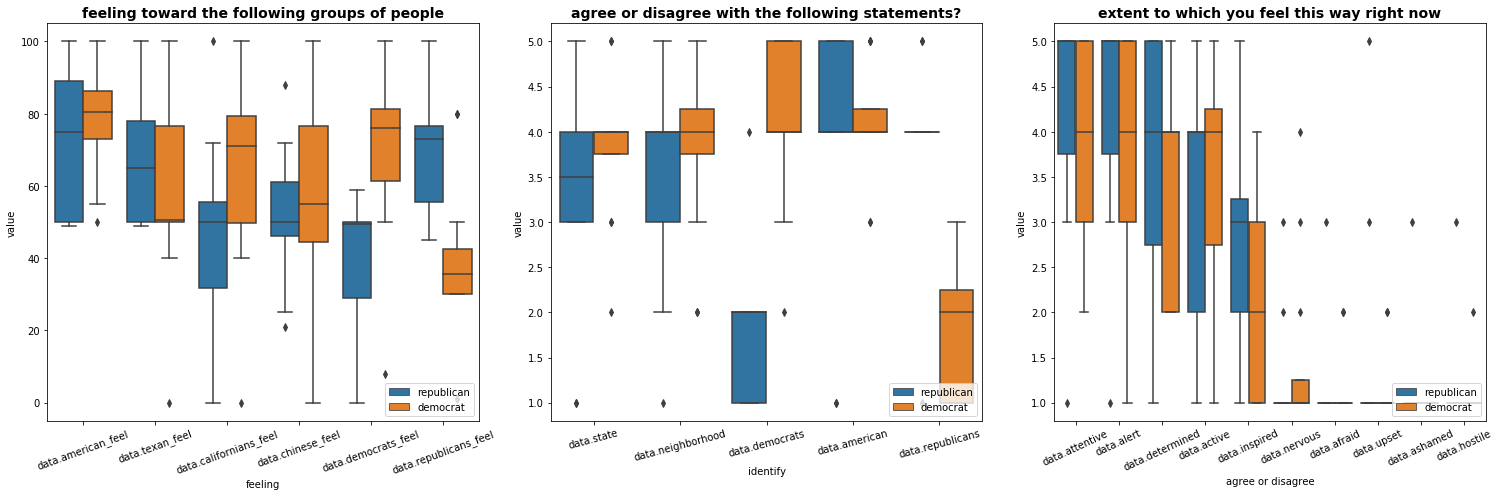

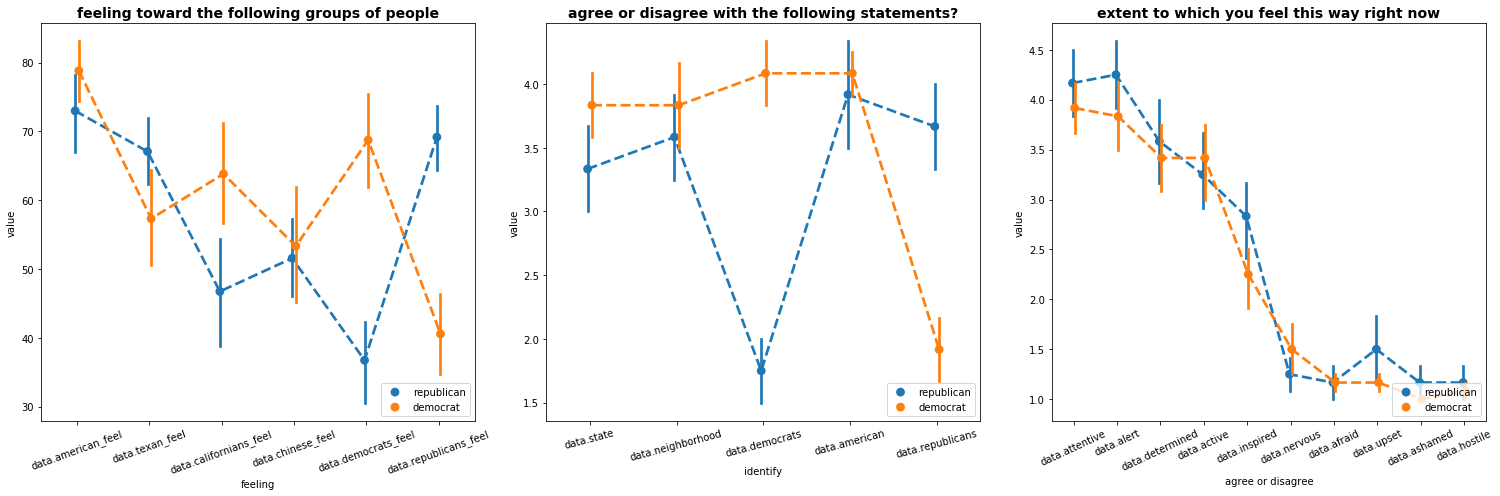

In [98]:
display(HTML('<h2>3. Exit survey responses </h2>'))

plt.figure(figsize = (21, 7))
plt.subplot(131)
exit_feeling=pd.melt(data,id_vars=['data.political_affiliation'],value_vars=[u'data.american_feel', \
           u'data.texan_feel',  u'data.californians_feel', \
           u'data.chinese_feel',u'data.democrats_feel', u'data.republicans_feel'],var_name='feeling')
sns.boxplot(x='feeling',y='value',data=exit_feeling,hue='data.political_affiliation')
plt.title('feeling toward the following groups of people', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 4)
plt.xticks(rotation = 20)

plt.subplot(132)
exit_statement =pd.melt(data,id_vars=['data.political_affiliation'],value_vars=[u'data.state', \
           u'data.neighborhood',  u'data.democrats', u'data.american', u'data.republicans'],\
var_name='identify')
plt.title('agree or disagree with the following statements?', fontsize = 14, fontweight = 'bold')
sns.boxplot(x='identify',y='value',data=exit_statement,hue='data.political_affiliation')
plt.legend(loc = 4)
plt.xticks(rotation = 15)

plt.subplot(133)
exit_feel = pd.melt(data,id_vars=['data.political_affiliation'],value_vars=[\
       u'data.attentive', u'data.alert',u'data.determined', u'data.active', u'data.inspired',\
       u'data.nervous', u'data.afraid',  u'data.upset',\
       u'data.ashamed', u'data.hostile'],var_name='agree or disagree')
sns.boxplot(x='agree or disagree',y='value',data=exit_feel,hue='data.political_affiliation')
plt.title('extent to which you feel this way right now', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.legend(loc = 4)
plt.tight_layout()
plt.savefig('exit_survey.png')


plt.figure(figsize = (21, 7))
plt.subplot(131)
sns.pointplot(x='feeling',y='value',data=exit_feeling,dodge=True,ci = 68,  linestyles=["--", "--", "--"],hue='data.political_affiliation')
plt.title('feeling toward the following groups of people', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 4)
plt.xticks(rotation = 20)

plt.subplot(132)
plt.title('agree or disagree with the following statements?', fontsize = 14, fontweight = 'bold')
sns.pointplot(x='identify',y='value',dodge=True, linestyles=["--", "--", "--"],ci = 68, data=exit_statement,hue='data.political_affiliation')
plt.legend(loc = 4)
plt.xticks(rotation = 15)

plt.subplot(133)
sns.pointplot(x='agree or disagree',y='value',data=exit_feel,dodge=True, ci = 68, linestyles=["--", "--", "--"],hue='data.political_affiliation')
plt.title('extent to which you feel this way right now', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.legend(loc = 4)
plt.tight_layout()
plt.savefig('exit_survey_point_est.png')


- patriotic priming makes people more active, inspired, stronger american feel, identify more with people in my state and neighborhood, identify more as american 
- The repsonses of exit survey for enemy and apolitical priming are very similar


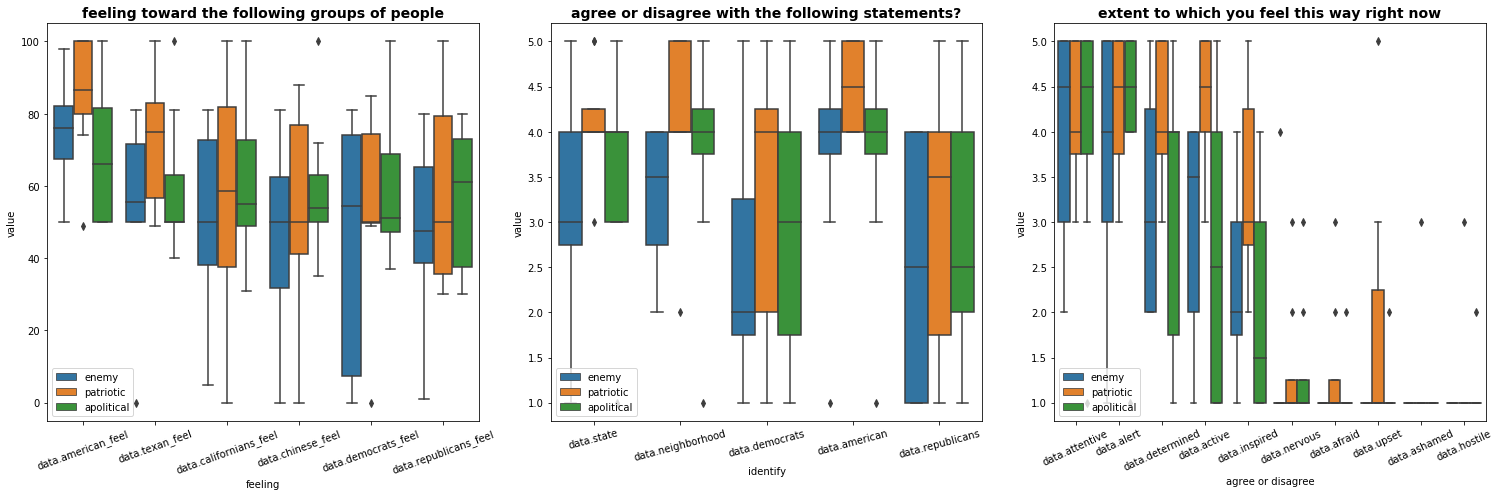

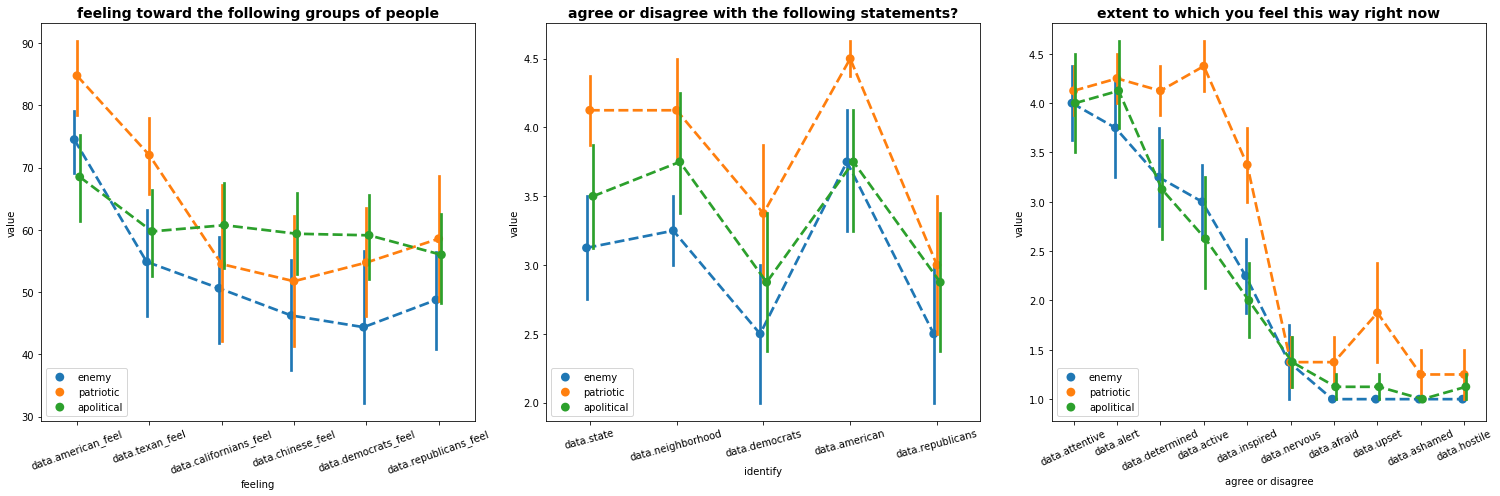

In [104]:
display(HTML('<h3>3.1 Exit survey responses with different priming </h2>'))
print('- patriotic priming makes people more active, inspired, stronger american feel, identify more with people in my state and neighborhood, identify more as american ')
print('- The repsonses of exit survey for enemy and apolitical priming are very similar')
plt.figure(figsize = (21, 7))
plt.subplot(131)
exit_feel =pd.melt(data,id_vars=['priming'],value_vars=[u'data.american_feel', \
           u'data.texan_feel',  u'data.californians_feel', \
           u'data.chinese_feel',u'data.democrats_feel', u'data.republicans_feel'],var_name='feeling')
sns.boxplot(x='feeling',y='value',data=exit_feel,hue='priming')
plt.title('feeling toward the following groups of people', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 3)
plt.xticks(rotation = 20)

plt.subplot(132)
exit_statement =pd.melt(data,id_vars=['priming'],value_vars=[u'data.state', \
           u'data.neighborhood',  u'data.democrats', u'data.american', u'data.republicans'],\
var_name='identify')
plt.title('agree or disagree with the following statements?', fontsize = 14, fontweight = 'bold')
sns.boxplot(x='identify',y='value',data=exit_statement,hue='priming')
plt.legend(loc = 3)
plt.xticks(rotation = 15)

plt.subplot(133)
exit_feeling =pd.melt(data,id_vars=['priming'],value_vars=[\
       u'data.attentive', u'data.alert',u'data.determined', u'data.active', u'data.inspired',\
       u'data.nervous', u'data.afraid',  u'data.upset',\
       u'data.ashamed', u'data.hostile'],var_name='agree or disagree')
sns.boxplot(x='agree or disagree',y='value',data=exit_feeling,hue='priming')
plt.title('extent to which you feel this way right now', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.legend(loc = 3)
plt.tight_layout()
plt.savefig('exit_survey_priming.png')


plt.figure(figsize = (21, 7))
plt.subplot(131)
sns.pointplot(x='feeling',y='value',data=exit_feel,dodge=True, ci = 68, linestyles=["--", "--", "--"],hue='priming')
plt.title('feeling toward the following groups of people', fontsize = 14, fontweight = 'bold')
plt.legend(loc = 3)
plt.xticks(rotation = 20)

plt.subplot(132)
plt.title('agree or disagree with the following statements?', fontsize = 14, fontweight = 'bold')
sns.pointplot(x='identify',y='value',dodge=True, ci = 68, linestyles=["--", "--", "--"],data=exit_statement,hue='priming')
plt.legend(loc = 3)
plt.xticks(rotation = 15)

plt.subplot(133)
dd=pd.melt(data,id_vars=['priming'],value_vars=[\
       u'data.attentive', u'data.alert',u'data.determined', u'data.active', u'data.inspired',\
       u'data.nervous', u'data.afraid',  u'data.upset',\
       u'data.ashamed', u'data.hostile'],var_name='agree or disagree')
sns.pointplot(x='agree or disagree',y='value',dodge=True, ci = 68, linestyles=["--", "--", "--"],data=exit_feeling,hue='priming')
plt.title('extent to which you feel this way right now', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.legend(loc = 3)
plt.tight_layout()
plt.savefig('exit_survey_priming_point_est.png')
